In [1]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
with open('../../timing_info/dask/four_gpu/resnet.json', 'r') as f:
    four_gpu = json.load(f)

In [4]:
four_gpu

[{'name': 'conv2_block1_2_conv',
  'layer': 10,
  'run_time': 514.5013387203217,
  'rank': 'worker2',
  'replaced': True,
  'score': [38.54265213012695, 0.8529000282287598]},
 {'name': 'conv2_block2_2_conv',
  'layer': 22,
  'run_time': 520.6781265735626,
  'rank': 'worker2',
  'replaced': True,
  'score': [38.456459045410156, 0.8669999837875366]},
 {'name': 'conv2_block3_2_conv',
  'layer': 32,
  'run_time': 531.4917006492615,
  'rank': 'worker1',
  'replaced': True,
  'score': [38.32576370239258, 0.8973000049591064]},
 {'name': 'conv3_block1_2_conv',
  'layer': 42,
  'run_time': 501.5565571784973,
  'rank': 'worker',
  'replaced': True,
  'score': [38.2477912902832, 0.8587999939918518]},
 {'name': 'conv3_block2_2_conv',
  'layer': 54,
  'run_time': 501.9984726905823,
  'rank': 'worker3',
  'replaced': True,
  'score': [37.996253967285156, 0.8988000154495239]},
 {'name': 'conv3_block3_2_conv',
  'layer': 64,
  'run_time': 504.52327513694763,
  'rank': 'worker',
  'replaced': True,
  '

In [5]:
gpu_totals = {}

for layer in four_gpu[:-3:]:
    if layer['rank'] not in gpu_totals:
        gpu_totals[layer['rank']] = layer['run_time']
    else:
        gpu_totals[layer['rank']] += layer['run_time']

In [6]:
gpu_totals

{'worker2': 2089.538773536682,
 'worker1': 2090.0640802383423,
 'worker': 2017.4545357227325,
 'worker3': 2070.019183397293}

In [7]:
job_count = {}

for layer in four_gpu[:-3:]:
    if layer['rank'] not in job_count:
        job_count[layer['rank']] = 1
    else:
        job_count[layer['rank']] += 1

In [8]:
job_count

{'worker2': 4, 'worker1': 4, 'worker': 4, 'worker3': 4}

In [9]:
gpu_0 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker"]

gpu_1 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker1"]

gpu_2 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker2"]

gpu_3 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker3"]
print(gpu_0, np.cumsum(gpu_0))
print(gpu_1, np.cumsum(gpu_1))
print(gpu_2, np.cumsum(gpu_2))
print(gpu_3, np.cumsum(gpu_3))

[501.5565571784973, 504.52327513694763, 505.0061264038086, 506.368577003479] [ 501.55655718 1006.07983232 1511.08595872 2017.45453572]
[531.4917006492615, 501.5156292915344, 504.19418144226074, 552.8625688552856] [ 531.49170065 1033.00732994 1537.20151138 2090.06408024]
[514.5013387203217, 520.6781265735626, 547.1579089164734, 507.20139932632446] [ 514.50133872 1035.17946529 1582.33737421 2089.53877354]
[501.9984726905823, 499.4793372154236, 554.7989211082458, 513.7424523830414] [ 501.99847269 1001.47780991 1556.27673101 2070.0191834 ]


In [10]:
# add zeros for stacked bar
# chart
# gpu_0.append(0)
# gpu_1.append(0)
# gpu_1.append(0)

print(gpu_0)
print(gpu_1)
print(gpu_2)
print(gpu_3)

[501.5565571784973, 504.52327513694763, 505.0061264038086, 506.368577003479]
[531.4917006492615, 501.5156292915344, 504.19418144226074, 552.8625688552856]
[514.5013387203217, 520.6781265735626, 547.1579089164734, 507.20139932632446]
[501.9984726905823, 499.4793372154236, 554.7989211082458, 513.7424523830414]


In [11]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0], gpu_3[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1], gpu_3[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2], gpu_3[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3], gpu_3[3]]

r = [0, 1, 2, 3]
names = ['gpu_0', 'gpu_1', 'gpu_2', 'gpu_3']

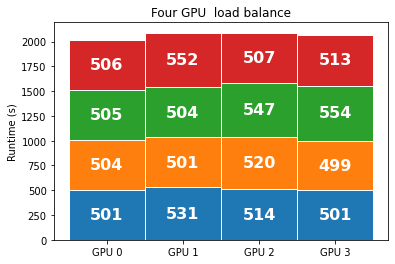

In [12]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % (str(int(h1)) if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % (str(int(h2)) if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % (str(int(h3)) if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  (str(int(h4)) if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_bin_pack_number.png", dpi=200)

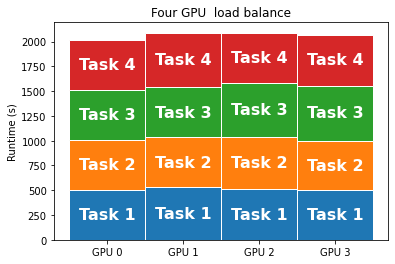

In [13]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % ("Task 1" if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % ("Task 2" if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % ("Task 3" if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  ("Task 4" if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_bin_pack_task.png", dpi=200)

In [14]:
gpu_0 = [layer['run_time'] for layer in four_gpu[0:-3:4]]

gpu_1 = [layer['run_time'] for layer in four_gpu[1:-3:4] ]

gpu_2 = [layer['run_time'] for layer in four_gpu[2:-3:4] ]

gpu_3 = [layer['run_time'] for layer in four_gpu[3:-3:4]]
print(gpu_0, np.cumsum(gpu_0))
print(gpu_1, np.cumsum(gpu_1))
print(gpu_2, np.cumsum(gpu_2))
print(gpu_3, np.cumsum(gpu_3))

[514.5013387203217, 501.9984726905823, 501.5156292915344, 552.8625688552856] [ 514.50133872 1016.49981141 1518.0154407  2070.87800956]
[520.6781265735626, 504.52327513694763, 505.0061264038086, 507.20139932632446] [ 520.67812657 1025.20140171 1530.20752811 2037.40892744]
[531.4917006492615, 547.1579089164734, 504.19418144226074, 554.7989211082458] [ 531.49170065 1078.64960957 1582.84379101 2137.64271212]
[501.5565571784973, 499.4793372154236, 506.368577003479, 513.7424523830414] [ 501.55655718 1001.03589439 1507.4044714  2021.14692378]


In [15]:
# add zeros for stacked bar
# chart
# gpu_1.append(0)
# gpu_2.append(0)
# gpu_3.append(0)

print(gpu_0)
print(gpu_1)
print(gpu_2)
print(gpu_3)

[514.5013387203217, 501.9984726905823, 501.5156292915344, 552.8625688552856]
[520.6781265735626, 504.52327513694763, 505.0061264038086, 507.20139932632446]
[531.4917006492615, 547.1579089164734, 504.19418144226074, 554.7989211082458]
[501.5565571784973, 499.4793372154236, 506.368577003479, 513.7424523830414]


In [16]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0], gpu_3[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1], gpu_3[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2], gpu_3[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3], gpu_3[3]]

r = [0, 1, 2, 3]
names = ['gpu_0', 'gpu_1', 'gpu_2', 'gpu_3']

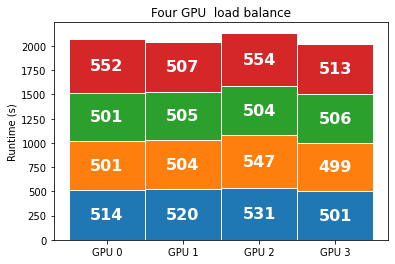

In [17]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % (str(int(h1)) if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % (str(int(h2)) if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % (str(int(h3)) if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  (str(int(h4)) if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_bin_pack_number.png", dpi=200)